In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [3]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [4]:
print(fruits.shape)

(59, 7)


### Statistical Summary

In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


### Fruit type distribution

In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


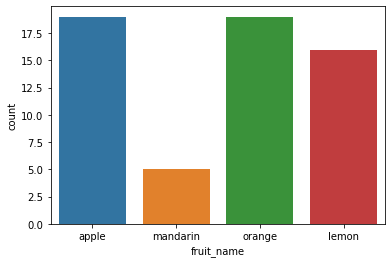

In [7]:
import seaborn as sns
sns.countplot(data=fruits,x='fruit_name',label="Count")
plt.show()

The data is pretty balanced except mandarin. We will just have to go with it. 

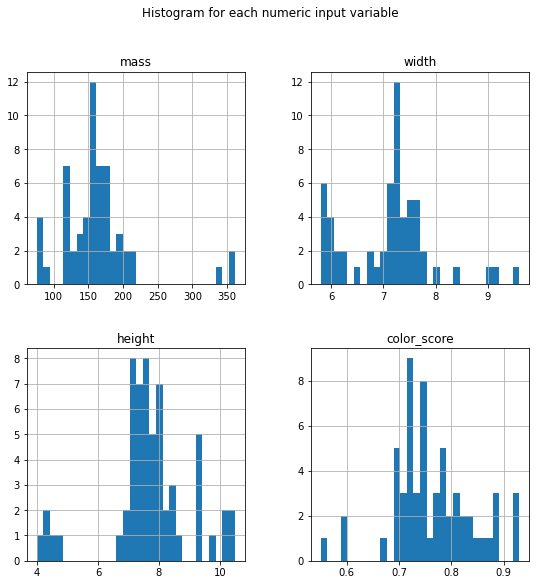

In [9]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
print(X)
print(y)

    mass  width  height  color_score
0    192    8.4     7.3         0.55
1    180    8.0     6.8         0.59
2    176    7.4     7.2         0.60
3     86    6.2     4.7         0.80
4     84    6.0     4.6         0.79
5     80    5.8     4.3         0.77
6     80    5.9     4.3         0.81
7     76    5.8     4.0         0.81
8    178    7.1     7.8         0.92
9    172    7.4     7.0         0.89
10   166    6.9     7.3         0.93
11   172    7.1     7.6         0.92
12   154    7.0     7.1         0.88
13   164    7.3     7.7         0.70
14   152    7.6     7.3         0.69
15   156    7.7     7.1         0.69
16   156    7.6     7.5         0.67
17   168    7.5     7.6         0.73
18   162    7.5     7.1         0.83
19   162    7.4     7.2         0.85
20   160    7.5     7.5         0.86
21   156    7.4     7.4         0.84
22   140    7.3     7.1         0.87
23   170    7.6     7.9         0.88
24   342    9.0     9.4         0.75
25   356    9.2     9.2         0.75
2

### Create training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train, X_test, y_train, y_test)

    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80
49   132    5.8     8.7         0.73
29   160    7.0     7.4         0.81
37   154    7.3     7.3         0.79
56   116    5.9     8.1         0.73
18   162    7.5     7.1         0.83
55   116    6.3     7.7         0.72
27   204    7.5     9.2         0.77
15   156    7.7     7.1         0.69
5     80    5.8     4.3         0.77
31   210    7.8     8.0         0.82
16   156    7.6     7.5         0.67
50   130    6.0     8.2         0.71
20   160    7.5     7.5         0.86
51   116    6.0     7.5         0.72
8    178    7.1     7.8         0.92
13   164    7.3     7.7         0.70
25   356    9.2     9.2         0.75
17   168    7.5     7.6         0.73
58   118    6.1     8.1         0.70
57   152    6.5     8.5         0.72
52   118    5.9     8.0         0.72
3

### Apply scalling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.         

## Build Models

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


#### Setting max decision tree depth to help avoid overfitting

In [17]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.60


### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


[0.6, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.26666666666666666, 0.3333333333333333, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666]


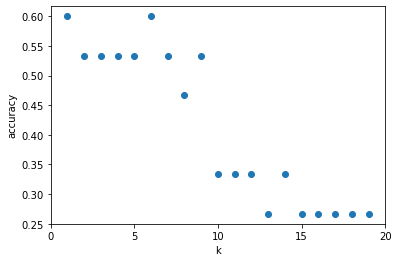

In [28]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
print(scores)

For this particular dateset, we obtain the highest accuracy when k=6.